In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks")

In [ ]:
precision_l0 = 0.01*np.identity(2)
precision_l1 = 0.1*np.identity(2)
precision_l2 = 1.0*np.identity(2)

x_value = np.linspace(-2, 2, 1000)
y_value = np.linspace(-2, 2, 1000)
x_value, y_value = np.meshgrid(x_value, y_value)

In [ ]:
def evaluate_density(x_value, y_value, precision):
    data = np.array([0, 0])
    transformed_parameters = np.zeros((2,) + x_value.shape)
    transformed_parameters[0,...] = np.sqrt(20 * (x_value ** 2 - 2 * y_value) ** 2)
    transformed_parameters[1,...] = np.sqrt(2 * (y_value - 0.25) ** 4)
    misfit = data.reshape((2,1,1)) - transformed_parameters
    logp = -0.5 * np.einsum('ijk,ijk->jk', misfit, np.einsum('ij,jkl->ikl', precision, misfit))
    probability = np.exp(logp)
    probability[probability < 1e-3] = np.nan
    return probability

def plot_density(x_value, y_value, density):
    fig, ax = plt.subplots(figsize=(4, 4), layout="constrained")
    ax.contourf(x_value, y_value, density, cmap="Blues", levels=50)
    ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-1, 2)
    ax.set_xticks((-2, -1, 0, 1, 2))
    ax.set_yticks((-1, 0, 1, 2))
    plt.show()

In [ ]:
density_l0 = evaluate_density(x_value, y_value, precision_l0)
density_l1 = evaluate_density(x_value, y_value, precision_l1)
density_l2 = evaluate_density(x_value, y_value, precision_l2)

plot_density(x_value, y_value, density_l0)
plot_density(x_value, y_value, density_l1)
plot_density(x_value, y_value, density_l2)

In [ ]:
#===================================================================================================

In [13]:
num_threads = [1, 2, 4, 8, 12]
run_times = [4176, 2684, 1770, 1256, 1106]
speedup = [run_times[0]/time for time in run_times]
perfect_speedup = [0,] + num_threads + [13,]

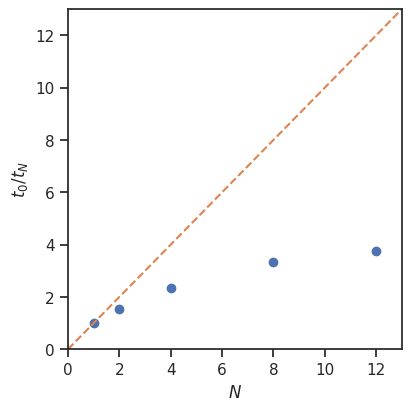

In [18]:
fig, ax = plt.subplots(figsize=(4, 4), layout="constrained")
ax.plot(num_threads, speedup, marker="o", linestyle="")
ax.plot(perfect_speedup, perfect_speedup, linestyle="--")
ax.set_xlabel(r"$N$")
ax.set_ylabel(r"$t_0 / t_N$")
ax.set_xlim(0, 13)
ax.set_ylim(0, 13)
fig.savefig("speedup.pdf")
plt.show()